In [14]:
import numpy as np

In [15]:
x1 = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
x2 = [2.4, 0.7, 2.9, 2.2, 3, 2.7, 1.6, 1.1, 1.6, 0.9] 

In [23]:
x = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2], 
    [3.1, 3],
    [2.3, 2.7], 
    [2, 1.6], 
    [1, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
      
])

In [24]:
x

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [25]:
x.shape

(10, 2)

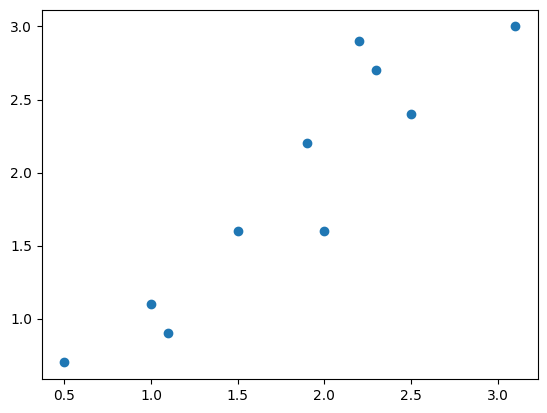

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x[:,0], x[:,1])
plt.show()

 Steps for performing dimensionality reduction using Principal Component Analysis (PCA):

1. Standardize the Data
   Ensure each feature has a mean of zero and a standard deviation of one.
2. Compute the Covariance Matrix

   Calculate the covariance matrix to understand how features in the data are correlated.
3. Calculate the Eigenvectors and Eigenvalues

   Compute the eigenvectors and eigenvalues of the covariance matrix to identify principal components.
4. Sort Eigenvalues in Descending Order and Select Principal Components

   Rank the eigenvalues from highest to lowest, and select the top eigenvectors (principal components) based on the desired level of dimensionality reduction.
5. Reduce the Dimension of the Dataset

   Transform the original dataset by projecting it onto the selected principal components, resulting in a reduced-dimensional representation.

step 1

In [34]:
xbar = x.mean(axis = 0)
xbar

array([1.81, 1.91])

array([1.81, 1.91])

In [33]:
sigma = np.std(x, axis= 0 , ddof = 1) # ddof = 1 divides by N-1 for std
sigma

array([0.78521052, 0.84649605])

In [35]:
# so the standert data is like
z = (x-xbar)/sigma

In [37]:
z

array([[ 0.87874523,  0.57885681],
       [-1.6683424 , -1.42942192],
       [ 0.49668209,  1.16952702],
       [ 0.11461894,  0.34258872],
       [ 1.64287153,  1.28766107],
       [ 0.62403647,  0.93325894],
       [ 0.24197333, -0.36621553],
       [-1.03157049, -0.95688575],
       [-0.39479858, -0.36621553],
       [-0.90421611, -1.19315383]])

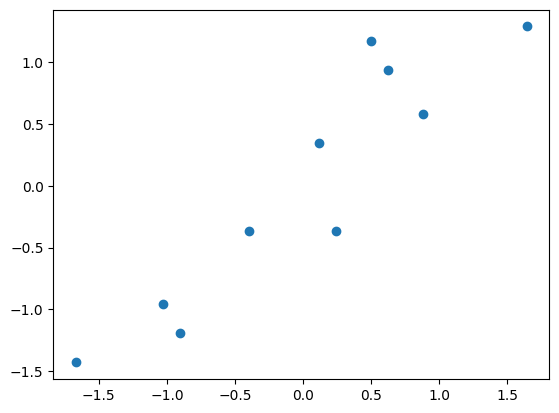

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(z[:,0], z[:,1])
plt.show()

In [40]:
np.round(z.mean(axis = 0), 2)

array([-0.,  0.])

In [42]:
z.std(axis = 0, ddof =1)

array([1., 1.])

step 2: compute the covariance

In [45]:
cov_mat = np.cov(x, rowvar=False)
cov_mat

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

Step 3: calclulate eigenvalues & eigenvectores

In [ ]:
eigenvalues, eigenvectores = np.linalg.eigh(cov_mat)

In [49]:
eigenvalues,eigenvectores

(array([0.0490834 , 1.28402771]),
 array([[-0.73517866,  0.6778734 ],
        [ 0.6778734 ,  0.73517866]]))

Step 4: Sort eigenvalues in descending order and compute the principal components

In [51]:
#sort the eigenvalues in decind order
sorted_index = np.argsort(eigenvalues)[::-1]

In [52]:
sorted_index

array([1, 0])

In [53]:
# similarly sort the eigenvectors 
sorted_eig_vect = eigenvectores[:, sorted_index]

In [54]:
sorted_eig_vect

array([[ 0.6778734 , -0.73517866],
       [ 0.73517866,  0.6778734 ]])

In [59]:
# this shows that first PCA shows %  variance
100 * eigenvalues[1]/sum(eigenvalues)

96.3181314348646

In [61]:
## select the first n eigenvectors, n is disired dimension 
# of our final reduced data
n_components = 1 # select the number components we wants
eigenvalues_subset = sorted_eig_vect[:, 0:n_components]
eigenvalues_subset

array([[0.6778734 ],
       [0.73517866]])

step 5: reduce the dimentsions of the data

In [62]:
# transform the data
transformed = np.matmul(x, eigenvalues_subset)
transformed

array([[3.45911227],
       [0.85356176],
       [3.62333958],
       [2.9053525 ],
       [4.3069435 ],
       [3.54409119],
       [2.53203265],
       [1.48656992],
       [2.19309595],
       [1.40732153]])

In [ ]:
### lets create the orginal data to veryfiy 
y = np.mutmul(transformed, )